In [ ]:
import zipfile
from io import BytesIO

import pandas as pd
import requests
import seaborn as sns

url = "https://www.kaggle.com/api/v1/datasets/download/swadeshi/stress-detection-dataset"
request = requests.get(url) # download file, kaggle puts the csv in a zip
file = zipfile.ZipFile(BytesIO(request.content)) # load the zip into ZipFile
csv = file.read(file.filelist[0]) # extract the first file into memory (RAM)
df = pd.read_csv(BytesIO(csv)) # read the file with pandas
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


<Axes: xlabel='sleep_duration', ylabel='PSS_score'>

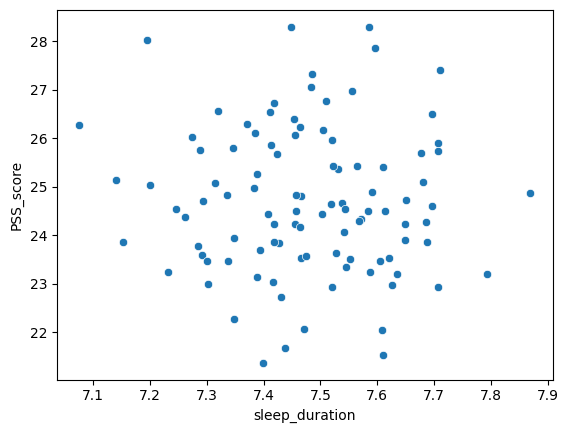

In [30]:
# see if participants who sleep less on average are more stressed
means = df.groupby("participant_id")[["sleep_duration", "PSS_score"]].mean()
sns.scatterplot(means, x="sleep_duration", y="PSS_score")

<Axes: xlabel='screen_on_time', ylabel='PSS_score'>

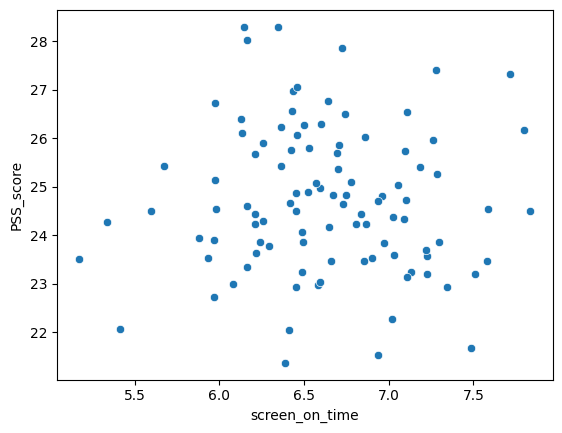

In [31]:
# see if participants who have more screen time on average are more stressed
means = df.groupby("participant_id")[["screen_on_time", "PSS_score"]].mean()
sns.scatterplot(means, x="screen_on_time", y="PSS_score")

<Axes: xlabel='PSQI_score', ylabel='PSS_score'>

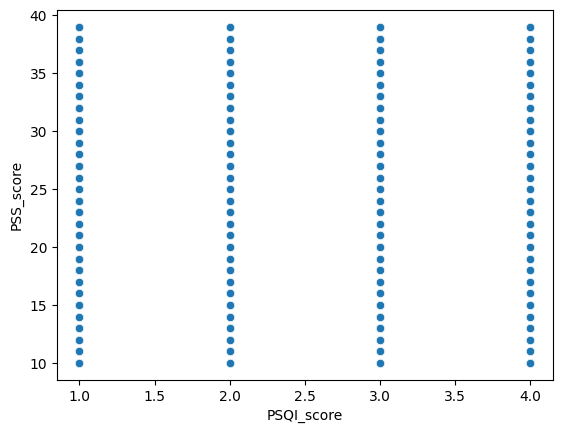

In [ ]:
# sanity check - is PSS correlated with PSQI?
sns.scatterplot(df, x="PSQI_score", y="PSS_score")

<Axes: xlabel='PSQI_score', ylabel='PSS_score'>

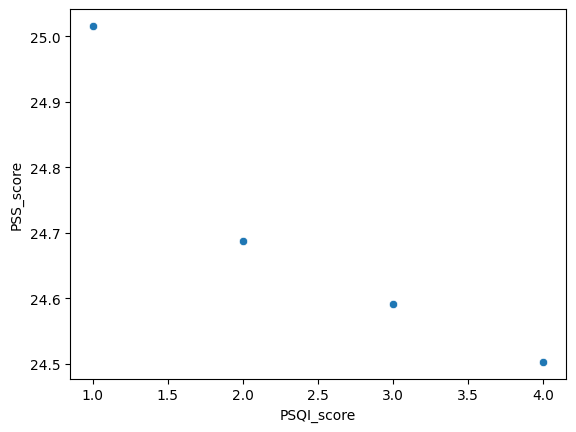

In [33]:
# sanity check - is PSS correlated with PSQI?
means = df.groupby("PSQI_score")[["PSS_score"]].mean()
sns.scatterplot(means, x="PSQI_score", y="PSS_score")